In [1]:
import json
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from scipy.stats import zscore
from sklearn.ensemble import IsolationForest

/tmp/ipykernel_5832/3398483468.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Carga de datos

In [2]:
directorio = 'datos_practica_3/starbucks'

dataframes = []

for filename in os.listdir(directorio):
    if filename.endswith('.json'):
        ruta_archivo = os.path.join(directorio, filename)
        
        with open(ruta_archivo, 'r') as archivo:
            data_json = []
            for linea in archivo:
                data = json.loads(linea)
                data_json.append(data)
        
        df = pd.DataFrame(data_json)
        dataframes.append(df)

### Nombrar los DataFrames

In [3]:
df_portfolio = dataframes[0]
df_profile = dataframes[1]
df_transcript = dataframes[2]

# Histograma edades

In [4]:
df_profile

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN
...,...,...,...,...,...
16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,20180604,54000.0
16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,20180713,72000.0
16997,M,49,01d26f638c274aa0b965d24cefe3183f,20170126,73000.0
16998,F,83,9dc1421481194dcd9400aec7c9ae6366,20160307,50000.0


In [5]:
df_profile['age'].astype(int)

0        118
1         55
2        118
3         75
4        118
        ... 
16995     45
16996     61
16997     49
16998     83
16999     62
Name: age, Length: 17000, dtype: int64

In [6]:
def graficar_histograma(df):
    if 'age' not in df.columns:
        print("La columna no está presente en el DataFrame.")
        return
    
    plt.hist(df['age'], bins=30, color='orange', edgecolor='black')
    
    plt.xlabel('Edad')
    plt.ylabel('Frecuencia')
    plt.title('Histograma de Edades')

    plt.show()

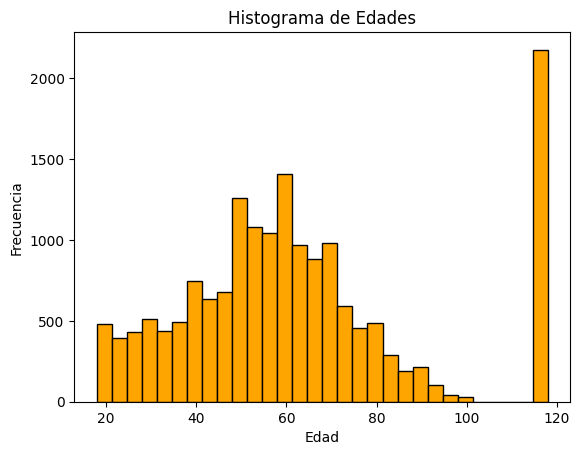

In [7]:
graficar_histograma(df_profile)

Existe una gran cantidad de registros de edades de 100 años, lo cual podríamos considerarlo como error de captura del registro, por lo que sería recomendable deshacernos de estos registros

# Conversión de fecha

In [8]:
df_profile['became_member_on']

0        20170212
1        20170715
2        20180712
3        20170509
4        20170804
           ...   
16995    20180604
16996    20180713
16997    20170126
16998    20160307
16999    20170722
Name: became_member_on, Length: 17000, dtype: object

In [9]:
df_profile['became_member_on'] = pd.to_datetime(df_profile['became_member_on'],format='%Y%m%d')

In [10]:
df_profile['became_member_on']

0       2017-02-12
1       2017-07-15
2       2018-07-12
3       2017-05-09
4       2017-08-04
           ...    
16995   2018-06-04
16996   2018-07-13
16997   2017-01-26
16998   2016-03-07
16999   2017-07-22
Name: became_member_on, Length: 17000, dtype: datetime64[ns]

# Tratamiento de valores nulos

### Columna gender

In [11]:
df_profile['gender'].isnull().sum()

2175

In [12]:
df_profile['age'].value_counts()

age
118    2175
58      408
53      372
51      363
54      359
       ... 
100      12
96        8
98        5
101       5
99        5
Name: count, Length: 85, dtype: int64

### Imputación por Missings

In [13]:
df_profile['gender_missing']=df_profile['gender']

In [14]:
df_profile

,gender,age,id,became_member_on,income,gender_missing
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,NaN,None
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,F
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,2018-07-12,NaN,None
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,F
4,None,118,a03223e636434f42ac4c3df47e8bac43,2017-08-04,NaN,None
...,...,...,...,...,...,...
16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,2018-06-04,54000.0,F
16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,2018-07-13,72000.0,M
16997,M,49,01d26f638c274aa0b965d24cefe3183f,2017-01-26,73000.0,M
16998,F,83,9dc1421481194dcd9400aec7c9ae6366,2016-03-07,50000.0,F


In [15]:
df_profile['gender'].fillna('Missing', inplace=True)

/tmp/ipykernel_5832/3677479936.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_profile['gender'].fillna('Missing', inplace=True)


In [16]:
df_profile

,gender,age,id,became_member_on,income,gender_missing
0,Missing,118,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,NaN,None
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,F
2,Missing,118,38fe809add3b4fcf9315a9694bb96ff5,2018-07-12,NaN,None
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,F
4,Missing,118,a03223e636434f42ac4c3df47e8bac43,2017-08-04,NaN,None
...,...,...,...,...,...,...
16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,2018-06-04,54000.0,F
16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,2018-07-13,72000.0,M
16997,M,49,01d26f638c274aa0b965d24cefe3183f,2017-01-26,73000.0,M
16998,F,83,9dc1421481194dcd9400aec7c9ae6366,2016-03-07,50000.0,F


### Imputación por Moda

In [17]:
df_profile['gender_missing'].isnull().sum()

2175

In [18]:
imputador_moda = SimpleImputer(strategy='most_frequent',missing_values=None)

In [19]:
imputador_moda

SimpleImputer(missing_values=None, strategy='most_frequent')

In [20]:
df_profile[['gender_imp_moda']]=imputador_moda.fit_transform(df_profile[['gender_missing']])
df_profile.drop(columns=['gender_missing'], inplace=True)

In [21]:
df_profile

,gender,age,id,became_member_on,income,gender_imp_moda
0,Missing,118,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,NaN,M
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,F
2,Missing,118,38fe809add3b4fcf9315a9694bb96ff5,2018-07-12,NaN,M
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,F
4,Missing,118,a03223e636434f42ac4c3df47e8bac43,2017-08-04,NaN,M
...,...,...,...,...,...,...
16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,2018-06-04,54000.0,F
16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,2018-07-13,72000.0,M
16997,M,49,01d26f638c274aa0b965d24cefe3183f,2017-01-26,73000.0,M
16998,F,83,9dc1421481194dcd9400aec7c9ae6366,2016-03-07,50000.0,F


In [22]:
df_profile[['gender']].isnull().sum()

gender    0
dtype: int64

# Filtar edades

In [23]:
df_profile.shape

(17000, 6)

In [24]:
df_profile = df_profile[df_profile['age'] <= 100]

In [25]:
df_profile.shape

(14820, 6)

# Subconjunto de transacciones

In [26]:
df_transcript

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.59},714
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714
306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.53},714


In [27]:
transactions = df_transcript[df_transcript['event'] == 'transaction']

In [28]:
transactions

,person,event,value,time
12654,02c083884c7d45b39cc68e1314fec56c,transaction,{'amount': 0.83},0
12657,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,transaction,{'amount': 34.56},0
12659,54890f68699049c2a04d415abc25e717,transaction,{'amount': 13.23},0
12670,b2f1cd155b864803ad8334cdf13c4bd2,transaction,{'amount': 19.51},0
12671,fe97aa22dd3e48c8b143116a8403dd52,transaction,{'amount': 18.97},0
...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.59},714
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714
306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.53},714


## Crear variable amount

In [29]:
transactions['amount']=transactions['value'].map(lambda x: next(iter(x.values())))

/tmp/ipykernel_5832/2466714391.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions['amount']=transactions['value'].map(lambda x: next(iter(x.values())))


In [30]:
transactions

,person,event,value,time,amount
12654,02c083884c7d45b39cc68e1314fec56c,transaction,{'amount': 0.83},0,0.83
12657,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,transaction,{'amount': 34.56},0,34.56
12659,54890f68699049c2a04d415abc25e717,transaction,{'amount': 13.23},0,13.23
12670,b2f1cd155b864803ad8334cdf13c4bd2,transaction,{'amount': 19.51},0,19.51
12671,fe97aa22dd3e48c8b143116a8403dd52,transaction,{'amount': 18.97},0,18.97
...,...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.59},714,1.59
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714,9.53
306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714,3.61
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.53},714,3.53


# Agrupación y Análisis de Transacciones


### Agrupación por person y aggregation functions

In [31]:
transactions

,person,event,value,time,amount
12654,02c083884c7d45b39cc68e1314fec56c,transaction,{'amount': 0.83},0,0.83
12657,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,transaction,{'amount': 34.56},0,34.56
12659,54890f68699049c2a04d415abc25e717,transaction,{'amount': 13.23},0,13.23
12670,b2f1cd155b864803ad8334cdf13c4bd2,transaction,{'amount': 19.51},0,19.51
12671,fe97aa22dd3e48c8b143116a8403dd52,transaction,{'amount': 18.97},0,18.97
...,...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.59},714,1.59
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714,9.53
306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714,3.61
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.53},714,3.53


In [32]:
aggregation_functions = {'amount': ['min' ,'max' ,'mean'], 'time': ['count', 'sum','mean']}

transactions = transactions.groupby('person').agg(aggregation_functions)

In [33]:
transactions

amount                     time              
                                    min     max       mean count   sum    mean
person                                                                        
0009655768c64bdeb2e877511632db8f   8.57   28.16  15.950000     8  4344  543.00
00116118485d4dfda04fdbaba9a87b5c   0.20    3.19   1.363333     3  1224  408.00
0011e0d4e6b944f998e987f904e8c1e5   8.96   23.03  15.892000     5  2256  451.20
0020c2b971eb4e9188eac86d93036a77  17.24   33.86  24.607500     8  2790  348.75
0020ccbbb6d84e358d3414a3ff76cffd   6.81   20.08  12.837500    12  4500  375.00
...                                 ...     ...        ...   ...   ...     ...
fff3ba4757bd42088c044ca26d73817a  10.99  388.22  52.816364    11  2706  246.00
fff7576017104bcc8677a8d63322b5e1   2.08    8.01   4.990000     6  2352  392.00
fff8957ea8b240a6b5e634b6ee8eafcf   0.64    6.39   2.430000     5  1896  379.20
fffad4f4828548d1b5583907f2e9906b   2.05   12.18   7.402500    12  3882  323.50
ffff82501cea40309d5fdd7edcca4a07   7.18   23.32  15.071333    15  5100  340.00

[16578 rows x 6 columns]

In [34]:
transactions.columns = ['_'.join(map(str, col)) for col in transactions.columns]
transactions.reset_index(inplace=True)

In [35]:
transactions

,person,amount_min,amount_max,amount_mean,time_count,time_sum,time_mean
0,0009655768c64bdeb2e877511632db8f,8.57,28.16,15.950000,8,4344,543.00
1,00116118485d4dfda04fdbaba9a87b5c,0.20,3.19,1.363333,3,1224,408.00
2,0011e0d4e6b944f998e987f904e8c1e5,8.96,23.03,15.892000,5,2256,451.20
3,0020c2b971eb4e9188eac86d93036a77,17.24,33.86,24.607500,8,2790,348.75
4,0020ccbbb6d84e358d3414a3ff76cffd,6.81,20.08,12.837500,12,4500,375.00
...,...,...,...,...,...,...,...
16573,fff3ba4757bd42088c044ca26d73817a,10.99,388.22,52.816364,11,2706,246.00
16574,fff7576017104bcc8677a8d63322b5e1,2.08,8.01,4.990000,6,2352,392.00
16575,fff8957ea8b240a6b5e634b6ee8eafcf,0.64,6.39,2.430000,5,1896,379.20
16576,fffad4f4828548d1b5583907f2e9906b,2.05,12.18,7.402500,12,3882,323.50


# Cruce de tablas

In [36]:
df_profile

,gender,age,id,became_member_on,income,gender_imp_moda
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,F
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,F
5,M,68,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0,M
8,M,65,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0,M
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,51000.0,M
...,...,...,...,...,...,...
16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,2018-06-04,54000.0,F
16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,2018-07-13,72000.0,M
16997,M,49,01d26f638c274aa0b965d24cefe3183f,2017-01-26,73000.0,M
16998,F,83,9dc1421481194dcd9400aec7c9ae6366,2016-03-07,50000.0,F


In [37]:
X = transactions.merge(df_profile[['age','income','id']], left_on='person', right_on='id', how='inner')

# Eliminar la columna 'id' y ajustar 'person' como índice
X.drop(columns=['id'], inplace=True)
X.set_index('person', inplace=True)
X.reset_index(inplace=True)

In [38]:
X

,person,amount_min,amount_max,amount_mean,time_count,time_sum,time_mean,age,income
0,0009655768c64bdeb2e877511632db8f,8.57,28.16,15.950000,8,4344,543.000000,33,72000.0
1,0011e0d4e6b944f998e987f904e8c1e5,8.96,23.03,15.892000,5,2256,451.200000,40,57000.0
2,0020c2b971eb4e9188eac86d93036a77,17.24,33.86,24.607500,8,2790,348.750000,59,90000.0
3,0020ccbbb6d84e358d3414a3ff76cffd,6.81,20.08,12.837500,12,4500,375.000000,24,60000.0
4,003d66b6608740288d6cc97a6903f4f0,0.44,7.41,2.685556,18,7590,421.666667,26,73000.0
...,...,...,...,...,...,...,...,...,...
14482,fff3ba4757bd42088c044ca26d73817a,10.99,388.22,52.816364,11,2706,246.000000,69,83000.0
14483,fff7576017104bcc8677a8d63322b5e1,2.08,8.01,4.990000,6,2352,392.000000,71,73000.0
14484,fff8957ea8b240a6b5e634b6ee8eafcf,0.64,6.39,2.430000,5,1896,379.200000,71,56000.0
14485,fffad4f4828548d1b5583907f2e9906b,2.05,12.18,7.402500,12,3882,323.500000,34,34000.0


# Detección de outliers

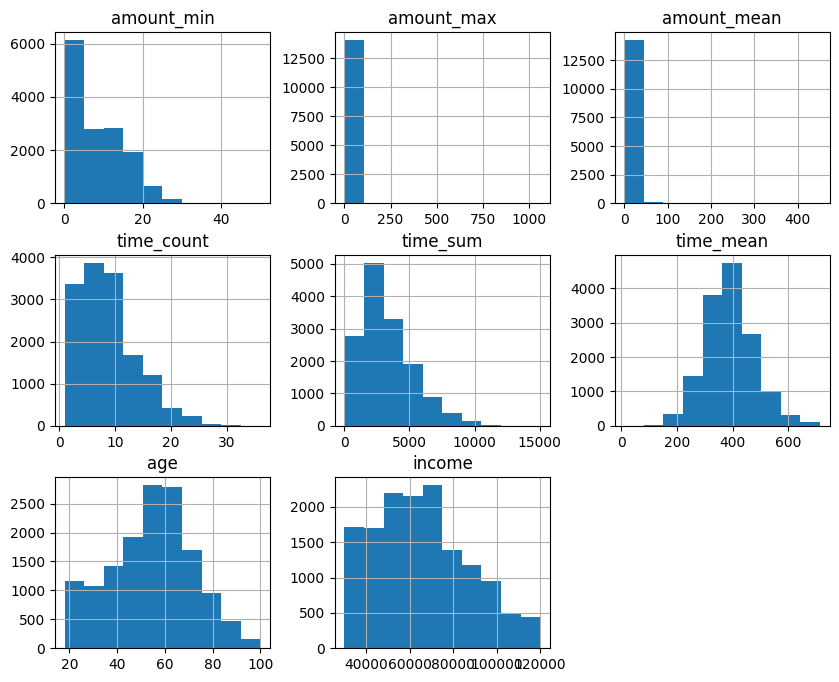

In [39]:
X.hist(figsize=(10,8));

In [40]:
var=['amount_min', 'amount_max', 'amount_mean', 'time_count', 'time_sum', 'time_mean', 'age', 'income']

for x in var:
    X[x].astype(int)

In [41]:
def outliers_IQR_ZS(df:pd.DataFrame, var):
    #el análisis multivariado requiere de todo el df, por lo que nos quedamos solo con las variables numericas (excluimos 'person')
    var_num = [col for col in df.columns if df[col].dtype != 'object']
    
    #Calcular IQR
    df_h=df[var]
    df_m=df[var_num]
    Q1 = df_h.quantile(0.25)
    Q3 = df_h.quantile(0.75)
    IQR = Q3 - Q1 
    mask_q =  ~(((df_h < (Q1 - 1.5 * IQR)) | (df_h > (Q3 + 1.5 * IQR)))).any(axis=1)

    #Calcular Z-score
    Z_scores = df_h.apply(zscore)
    mask_z = (Z_scores > -3) & (Z_scores < 3) 

    #Isolation forest
    iso_forest = IsolationForest(n_estimators=100, random_state=42)
    iso_forest.fit(df_m)
    iso_preds = iso_forest.predict(df_m)

    #salidas
    display(f'Nuestro DataFrame contiene {df_h.shape[0]} registros', 
            f'Al aplicar el método IQR, nos quedamos con {df_h[mask_q].shape[0]} registros', 
            f'Al aplicar el método Z-score, nos quedamos con {df_h[mask_z].shape[0]} registros',
            f'Al aplicar el método IsoForest, nos quedamos con {df_h[iso_preds==1].shape[0]} registros')
    
    display(df_h[mask_q])
    display(df_h[mask_z])
    display(df_h[iso_preds==1])

In [42]:
outliers_IQR_ZS(X,var)

'Nuestro DataFrame contiene 14487 registros'

'Al aplicar el método IQR, nos quedamos con 13182 registros'

'Al aplicar el método Z-score, nos quedamos con 14487 registros'

'Al aplicar el método IsoForest, nos quedamos con 13092 registros'

,amount_min,amount_max,amount_mean,time_count,time_sum,time_mean,age,income
0,8.57,28.16,15.950000,8,4344,543.000000,33,72000.0
1,8.96,23.03,15.892000,5,2256,451.200000,40,57000.0
2,17.24,33.86,24.607500,8,2790,348.750000,59,90000.0
3,6.81,20.08,12.837500,12,4500,375.000000,24,60000.0
4,0.44,7.41,2.685556,18,7590,421.666667,26,73000.0
...,...,...,...,...,...,...,...,...
14481,13.72,39.59,26.497273,11,4134,375.818182,59,93000.0
14483,2.08,8.01,4.990000,6,2352,392.000000,71,73000.0
14484,0.64,6.39,2.430000,5,1896,379.200000,71,56000.0
14485,2.05,12.18,7.402500,12,3882,323.500000,34,34000.0


,amount_min,amount_max,amount_mean,time_count,time_sum,time_mean,age,income
0,8.57,28.16,15.950000,8.0,4344.0,543.000000,33,72000.0
1,8.96,23.03,15.892000,5.0,2256.0,451.200000,40,57000.0
2,17.24,33.86,24.607500,8.0,2790.0,348.750000,59,90000.0
3,6.81,20.08,12.837500,12.0,4500.0,375.000000,24,60000.0
4,0.44,7.41,2.685556,18.0,7590.0,421.666667,26,73000.0
...,...,...,...,...,...,...,...,...
14482,10.99,NaN,52.816364,11.0,2706.0,246.000000,69,83000.0
14483,2.08,8.01,4.990000,6.0,2352.0,392.000000,71,73000.0
14484,0.64,6.39,2.430000,5.0,1896.0,379.200000,71,56000.0
14485,2.05,12.18,7.402500,12.0,3882.0,323.500000,34,34000.0


,amount_min,amount_max,amount_mean,time_count,time_sum,time_mean,age,income
0,8.57,28.16,15.950000,8,4344,543.000000,33,72000.0
1,8.96,23.03,15.892000,5,2256,451.200000,40,57000.0
2,17.24,33.86,24.607500,8,2790,348.750000,59,90000.0
3,6.81,20.08,12.837500,12,4500,375.000000,24,60000.0
4,0.44,7.41,2.685556,18,7590,421.666667,26,73000.0
...,...,...,...,...,...,...,...,...
14481,13.72,39.59,26.497273,11,4134,375.818182,59,93000.0
14483,2.08,8.01,4.990000,6,2352,392.000000,71,73000.0
14484,0.64,6.39,2.430000,5,1896,379.200000,71,56000.0
14485,2.05,12.18,7.402500,12,3882,323.500000,34,34000.0


# Detectar outliers de age

In [44]:
X

,person,amount_min,amount_max,amount_mean,time_count,time_sum,time_mean,age,income
0,0009655768c64bdeb2e877511632db8f,8.57,28.16,15.950000,8,4344,543.000000,33,72000.0
1,0011e0d4e6b944f998e987f904e8c1e5,8.96,23.03,15.892000,5,2256,451.200000,40,57000.0
2,0020c2b971eb4e9188eac86d93036a77,17.24,33.86,24.607500,8,2790,348.750000,59,90000.0
3,0020ccbbb6d84e358d3414a3ff76cffd,6.81,20.08,12.837500,12,4500,375.000000,24,60000.0
4,003d66b6608740288d6cc97a6903f4f0,0.44,7.41,2.685556,18,7590,421.666667,26,73000.0
...,...,...,...,...,...,...,...,...,...
14482,fff3ba4757bd42088c044ca26d73817a,10.99,388.22,52.816364,11,2706,246.000000,69,83000.0
14483,fff7576017104bcc8677a8d63322b5e1,2.08,8.01,4.990000,6,2352,392.000000,71,73000.0
14484,fff8957ea8b240a6b5e634b6ee8eafcf,0.64,6.39,2.430000,5,1896,379.200000,71,56000.0
14485,fffad4f4828548d1b5583907f2e9906b,2.05,12.18,7.402500,12,3882,323.500000,34,34000.0


In [45]:
outliers_IQR_ZS(X,['age'])

'Nuestro DataFrame contiene 14487 registros'

'Al aplicar el método IQR, nos quedamos con 14487 registros'

'Al aplicar el método Z-score, nos quedamos con 14487 registros'

'Al aplicar el método IsoForest, nos quedamos con 13092 registros'

,age
0,33
1,40
2,59
3,24
4,26
...,...
14482,69
14483,71
14484,71
14485,34


,age
0,33
1,40
2,59
3,24
4,26
...,...
14482,69
14483,71
14484,71
14485,34


,age
0,33
1,40
2,59
3,24
4,26
...,...
14481,59
14483,71
14484,71
14485,34


### Exportar datos para elaborar el Dashboard

In [46]:
# X.to_excel('datos_finales_starbucks.xlsx', index=False)  

In [47]:
# X